In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
power_plant_data = pd.read_excel('Power_plant.xlsx')

In [9]:
power_plant_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [14]:
power_plant_data.rename(columns={'AT':'Temperature','V':'Exhaust_Vacuum','AP':'Ambient_Pressure','RH':'Relative Humidity','PE':'Energy Output'},inplace=True)

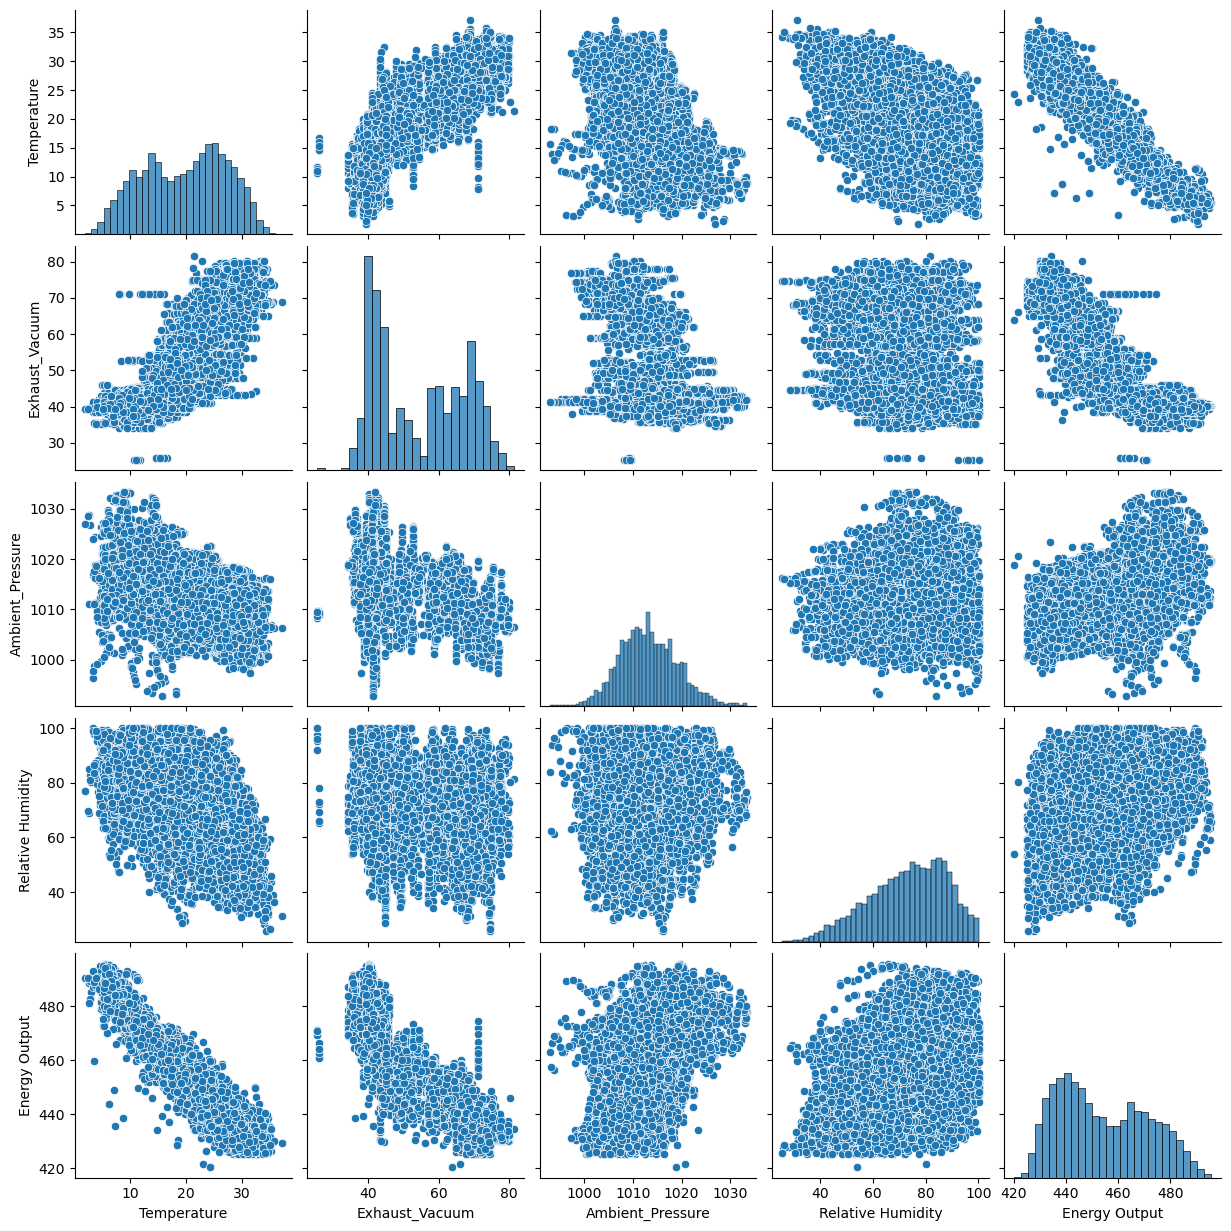

In [15]:
sns.pairplot(power_plant_data)

In [16]:
correlation_matrix = power_plant_data.corr()

(correlation_matrix*100).round(2)


,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative Humidity,Energy Output
Temperature,100.00,84.41,-50.75,-54.25,-94.81
Exhaust_Vacuum,84.41,100.00,-41.35,-31.22,-86.98
Ambient_Pressure,-50.75,-41.35,100.00,9.96,51.84
Relative Humidity,-54.25,-31.22,9.96,100.00,38.98
Energy Output,-94.81,-86.98,51.84,38.98,100.00


In [17]:
X = power_plant_data.iloc[:,:-1]
y = power_plant_data.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [21]:
lr = LinearRegression()

<IPython.core.display.Javascript object>

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
#importing Linear regression measuring parameters

from sklearn.metrics import mean_squared_error,r2_score

In [25]:
mse = mean_squared_error(y_pred,y_test)
mse

20.584714106522377

In [26]:
r2 = r2_score(y_pred,y_test)
r2

0.9242607769960037

Text(0.5, 1.0, 'Actual vs. Predicted')

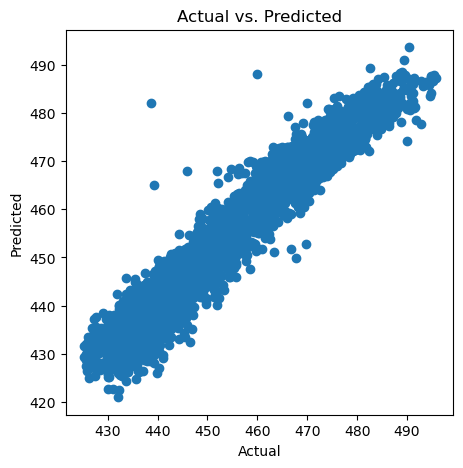

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [43]:
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
pred_y_df [0:20]

,Actual Value,Predicted value,Difference
8164,484.42,478.984496,5.435504
3894,475.14,469.785971,5.354029
6322,442.82,447.284532,-4.464532
1668,441.97,437.120547,4.849453
8818,467.03,468.570825,-1.540825
8084,476.61,480.173097,-3.563097
1079,448.10,450.956182,-2.856182
4549,475.85,477.091115,-1.241115
6507,437.22,435.595506,1.624494
1326,449.48,444.807596,4.672404


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


             feature        VIF
0        Temperature  39.157705
1     Exhaust_Vacuum  74.969127
2   Ambient_Pressure  66.618618
3  Relative Humidity  40.704756


In [45]:
correlation_matrix = power_plant_data.corr()

(correlation_matrix*100).round(2)

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative Humidity,Energy Output
Temperature,100.00,84.41,-50.75,-54.25,-94.81
Exhaust_Vacuum,84.41,100.00,-41.35,-31.22,-86.98
Ambient_Pressure,-50.75,-41.35,100.00,9.96,51.84
Relative Humidity,-54.25,-31.22,9.96,100.00,38.98
Energy Output,-94.81,-86.98,51.84,38.98,100.00


In [63]:
def get_test_train(input_data):
    X = input_data.iloc[:,:-1]
    y = input_data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)
    return X,y,X_train, X_test, y_train, y_test

Performing Linear Regression after removing the Exhaust_Vacuum column due to high variance inflation factor. 

In [47]:
power_plant_data_updated = power_plant_data.drop(columns=['Exhaust_Vacuum'])

In [48]:
power_plant_data_updated.head()

,Temperature,Ambient_Pressure,Relative Humidity,Energy Output
0,14.96,1024.07,73.17,463.26
1,25.18,1020.04,59.08,444.37
2,5.11,1012.16,92.14,488.56
3,20.86,1010.24,76.64,446.48
4,10.82,1009.23,96.62,473.90


In [64]:
X,y,X_train, X_test, y_train, y_test = get_test_train(power_plant_data_updated)

In [65]:
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
mse = mean_squared_error(y_pred,y_test)
mse

23.104661690423107

In [68]:
r2 = r2_score(y_pred,y_test)
r2

0.9146557216820196

In [71]:
n,p = X.shape

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

adjusted_r2

0.9146289512057593

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0        Temperature  10.821373
1   Ambient_Pressure  64.595152
2  Relative Humidity  36.414049


In [70]:
correlation_matrix = power_plant_data_updated.corr()

(correlation_matrix*100).round(2)

,Temperature,Ambient_Pressure,Relative Humidity,Energy Output
Temperature,100.00,-50.75,-54.25,-94.81
Ambient_Pressure,-50.75,100.00,9.96,51.84
Relative Humidity,-54.25,9.96,100.00,38.98
Energy Output,-94.81,51.84,38.98,100.00
